## Example (Chapter 4, Problem 7 from ISLR)

Some of the notation in chapter 4 is super confusing, so this is the result of an office hours session with Suzanne. Thanks! :)

Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on $X$, last year’s percent proﬁt. We examine a large number of companies and discover that the mean value of $X$ for companies that issued a dividend was $\bar{X}$ __= 10__, while the mean for those that didn’t was $\bar{X}$ __= 0__. In addition, the __variance of__ $X$ __for these two sets of companies was__ $\sigma^2$ __= 36__. Finally, __80% of companies issued dividends__. Assuming that $X$ follows a normal distribution, predict the probability that a company will issue a dividend this year __given that its percentage proﬁt was__ $X$ __= 4__ last year.

In [1]:
x = 4;
pi1 = .8;
pi2 = 1 - pi1; #Since we only have two classes, the prior of it being in class 2 will just be 1 - pi_1.

probModel1 = dnorm(x, mean = 10, sd = 6, log = FALSE)
probModel2 = dnorm(x, mean = 0, sd = 6, log = FALSE)

If we plot the values values without the priors, we would get something like this:

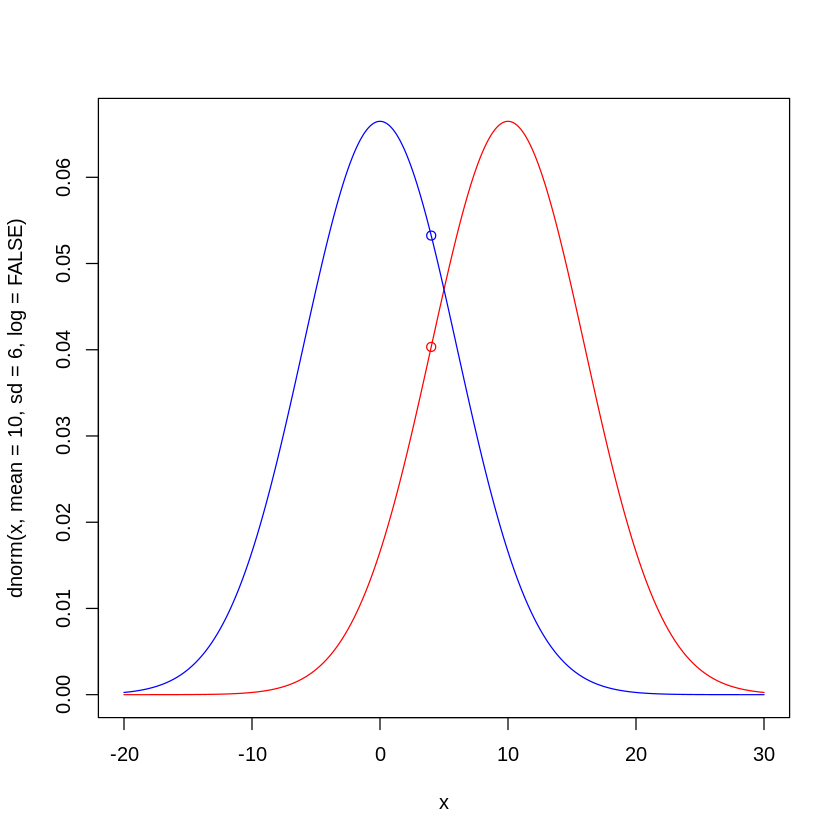

In [2]:
#Plotting the normal distributions without the priors.
x = seq(-20,30,length=1000);
plot(x,dnorm(x,mean=10,sd=6,log=FALSE),type='l',col="red")
lines(x,dnorm(x,mean=0,sd=6,log=FALSE),type='l',col="blue")
x = 4;
points(x,probModel1,type='o',col="red")
points(x,probModel2,type='o',col="blue")

The blue distribution tells us the probability of us being in class Red and the red tells us the probability of being in class Blue. Without considering the priors, having an $X =4$ will tell us that we are in class Red (it is higher on the graph).

However, we ARE given some information about the two models. There is an 80% chance that the company will issue dividends. So our probability models will shift. 

__Baye's Rule:__

$$ Pr(Y=k|X=x) = \frac{\pi_k f_k(x)}{\sum_{l=1}^{K}\pi_l f_l(x)} $$

little $k$ is the probability model (the normal distribution of that class)
and big $K$ is the actual class itself.

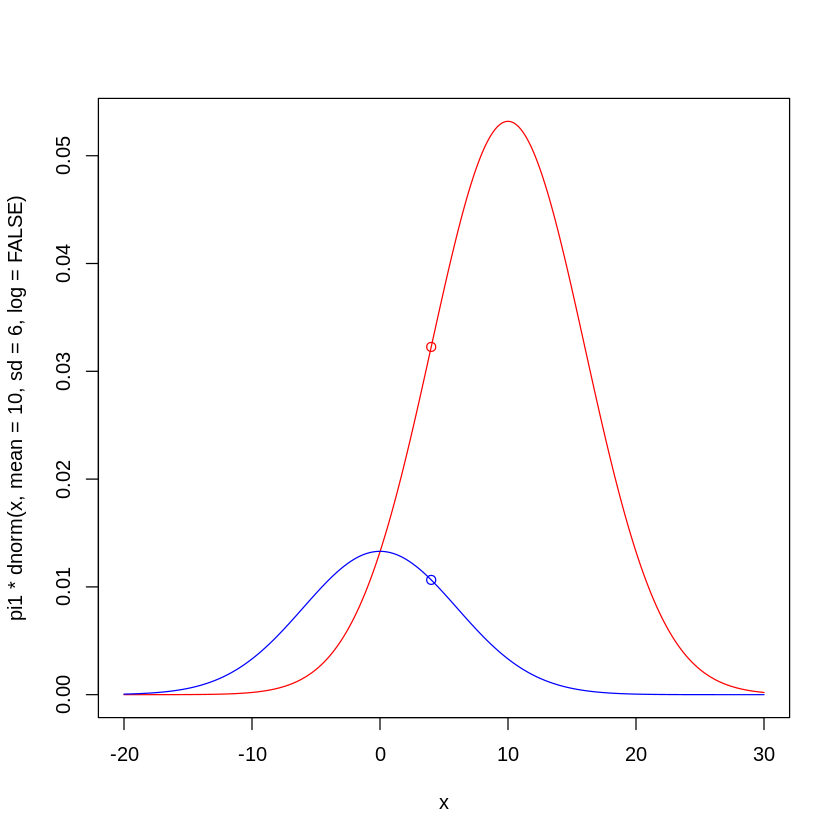

In [3]:
#Plotting the Probabilities while Considering the priors.
x = seq(-20,30,length=1000);
plot(x,pi1*dnorm(x,mean=10,sd=6,log=FALSE),type='l',col="red")
lines(x,pi2*dnorm(x,mean=0,sd=6,log=FALSE),type='l',col="blue")
x = 4;
points(x,pi1*probModel1,type='o',col="red")
points(x,pi2*probModel2,type='o',col="blue")

Notice how much our probabilities shifted just because of the presence of our priors. Similar to the typical Baye's rule example of having a rare disease, the probability is shifted significantly because of the known value of our prior! We can clearly see that this SHOULD be class Red instead.

But even though we have the probabilities scaled with their priors, Baye's tells us to go a bit further and then say, "Hey, I know that the point has to be either class Blue or class Red (or class ...), so why don't I just divide by the probabilities of being in those classes? IE:

$$ Pr(Y=yes|X=4) = \frac{0.8*N\text{~}(10,36)_{x=4}}{0.8*N\text{~ }(10,36)_{x=4} + 0.2*N\text{~ }(0,36)_{x=4}} = 75.2\%$$

$$ Pr(Y=no|X=4) = \frac{0.2*N\text{~}(0,36)_{x=4}}{0.8*N\text{~ }(10,36)_{x=4} + 0.2*N\text{~ }(0,36)_{x=4}} = 24.8\%$$

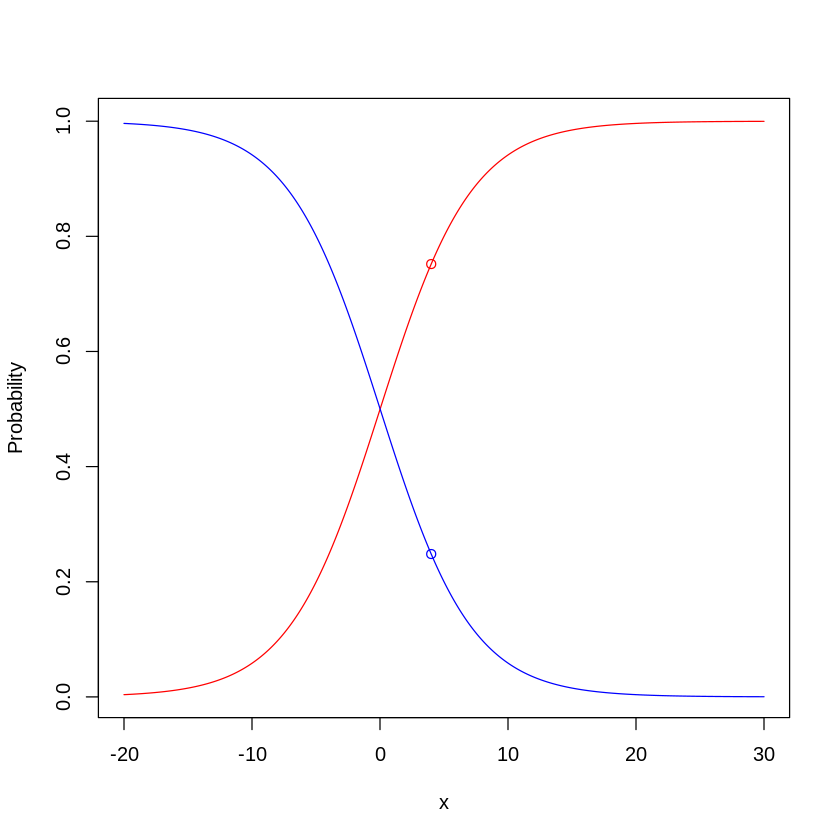

In [4]:
#Probability in Model 1 or Model2 
x = seq(-20,30,length=1000);

pi1 = .8;
pi2 = 1 - pi1; 

plot(x,pi1*dnorm(x,mean=10,sd=6,log=FALSE)/(pi1*dnorm(x,mean=10,sd=6,log=FALSE)+pi2*dnorm(x,mean=0,sd=6,log=FALSE)),type='l',col="red",ylab="Probability")
lines(x,pi2*dnorm(x,mean=0,sd=6,log=FALSE)/(pi1*dnorm(x,mean=10,sd=6,log=FALSE)+pi2*dnorm(x,mean=0,sd=6,log=FALSE)),type='l',col="blue")

x = 4;
lines(x,pi1*dnorm(x,mean=10,sd=6,log=FALSE)/(pi1*dnorm(x,mean=10,sd=6,log=FALSE)+pi2*dnorm(x,mean=0,sd=6,log=FALSE)),type='o',col="red",ylab="Probability")
lines(x,pi2*dnorm(x,mean=0,sd=6,log=FALSE)/(pi1*dnorm(x,mean=10,sd=6,log=FALSE)+pi2*dnorm(x,mean=0,sd=6,log=FALSE)),type='o',col="blue")

This tells us the probability of being in each class as we go through different X values. Swanky!

Honestly this is enough, but the text takes it another step further: Since the bottom is the same for everything, why don't we just consider the top half of the equation, but log() it? We would get the same thing.

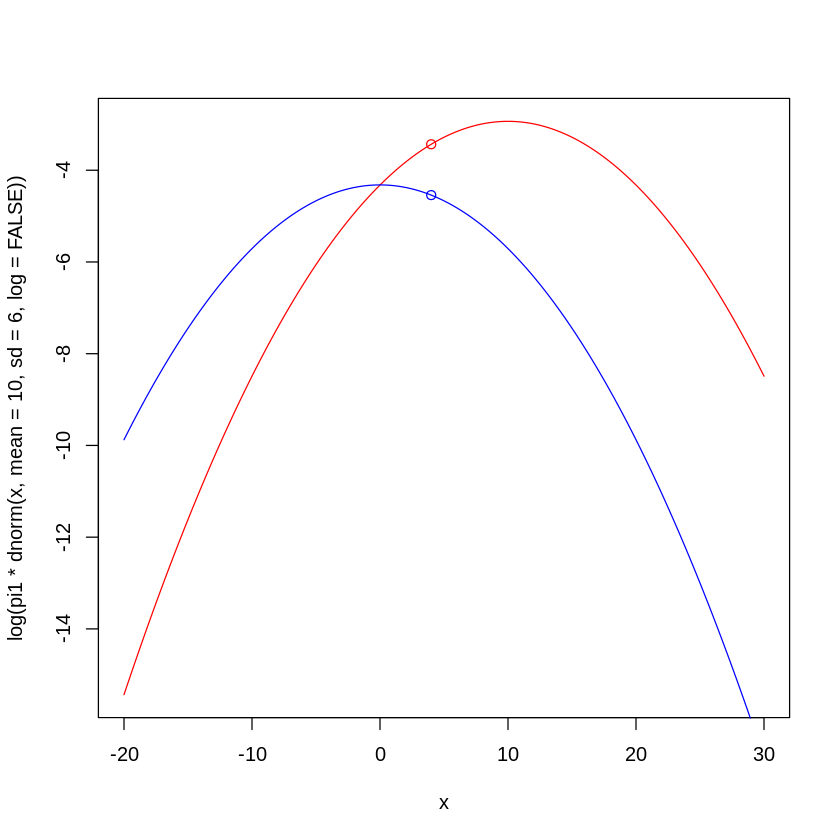

In [5]:
#Plotting the Discriminants
x = seq(-20,30,length=1000);
plot(x,log(pi1*dnorm(x,mean=10,sd=6,log=FALSE)),type='l',col="red")
lines(x,log(pi2*dnorm(x,mean=0,sd=6,log=FALSE)),type='l',col="blue")
x = 4;
points(x,log(pi1*probModel1),type='o',col="red")
points(x,log(pi2*probModel2),type='o',col="blue")

Long chapter short, essentially all the equations in chapter 4 are telling us the same thing, and we don't need 5 of them.